# Hazard models

**Aging** - increased chance of death with age.

You have seen this picture on the previous lesson {cite}`lifetables`.  

![Risk of mortality](https://upload.wikimedia.org/wikipedia/en/4/4d/USGompertzCurve.svg)

At this lesson we learn how to understand such mortality risk curves and much more. We will learn Gompertz model - the central conception in aging research.

## Survival curve

Let $T$ is a non-negative random variable with a corresponding distribution function:

$$F(t) = P(T\leq t)$$ 

We call $T$ - *survival time* or time before death of some object (e.g. human). For example, $T$ can have normal distribution:

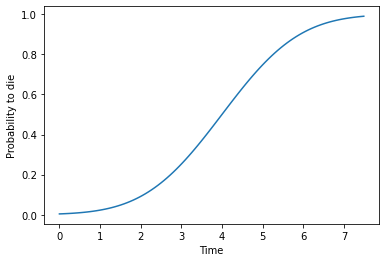

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

rv = norm(loc=4, scale=1.5)
t = np.linspace(0, norm.ppf(0.99, loc=4, scale=1.5), 100)
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Probability to die')
ax.plot(t, rv.cdf(t));

If $F(t)$ is a probability to die before time moment $T$ we can introduce a probability to survive before this moment $S$ as just a complement to $F$:

$$S(t) = P(T > t) = 1 - F(t)$$ 

Let's draw it:

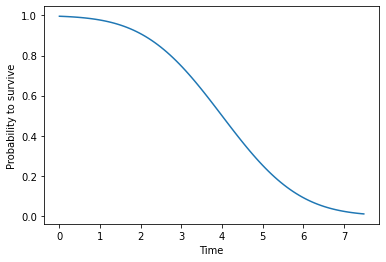

In [2]:
rv = norm(loc=4, scale=1.5)
t = np.linspace(0, norm.ppf(0.99, loc=4, scale=1.5), 100)
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Probability to survive')
ax.plot(t, 1 - rv.cdf(t));

This plot is what we actually call *survival curve*. The intuition behind this is rather straightforward - it shows how many of experimental objects survived before a partucular moment of time. You can see a lot of empirical versions of such curves in articles. Rigorous analysis of this curves helps to avoid a misinterpretation of typical drug-testing experiment or other. And it's what we are going to do in further.

## Mortality risk

You could have heard that mortality risk increases exponentially with aging. But what does this actually mean?

```{note}
:class: dropdown
Mortality risk is **not** a probability of death!
```

Let's consider instantaneous probability of death that the object will die within a time interval $dt$ by condition that it already survived to moment $T$:

$$\lim_{dt \to 0}\frac{P(t < T ≤ t + dt | T > t)}{dt}$$

This conditional probability can be decomposed by definition as follows: 

$$P(A ∩ B) = P(A|B)P(B)$$
T
his yields:

$$P(t < T ≤ t + dt ∩ T > t) = P(t < T ≤ t + dt | T > t)P(T > t)$$

$$P(t < T ≤ t + dt | T > t) = \frac{P(t < T ≤ t + dt ∩ T > t)}{P(T > t)}$$

Recall that $P(T > t) = 1 - F(t) = S(t)$ and $P(t < T ≤ t + dt) = F(t+dt) - F(t)$.

```{note}
:class: dropdown
To understand the last property it is enough to remember that probability function is just a square under probability density function!
```

Now let's rewrite our result:

$$P(t < T ≤ t + dt | T > t) = \frac{F(t+dt) - F(t)}{S(t)}$$

It's time to put our derivation to the first formula with a limit. So, we have:

$$\lim_{dt \to 0}\frac{P(t < T ≤ t + dt | T > t)}{dt} = \lim_{dt \to 0}\frac{F(t+dt) - F(t)}{dt}\frac{1}{S(t)} = \frac{f(t)}{S(t)}$$

Yes, we obtained a ratio of probability density function of death and probability of survival. And this is what we call **mortality risk function** or hazard function.

$$m(t) = \frac{f(t)}{S(t)} = -\frac{S'(t)}{S(t)}$$

```{dropdown} Exercise
:class: dropdown
Show that $f(t) = -S'(t)$.
```

This is actually the thing that increases exponentially as we age and have a name of Gompertz law (quite more complex than just a probability, isn't it?). Now let's consider different kinds of such functions.

## Gompertz law and kinds of mortality functions

### Constant risk model

We start with the simplest case of a constant mortality function. 

\begin{gather*}
m(t) = m_0\\
S(t) = \exp(-m_0t)\\
f(t) = m_0\cdot \exp(-m_0t)
\end{gather*}

```{dropdown} Exercise
:class: dropdown
Derive an expression for $S(t)$ at constant risk. **Hint:** use the result from the previous exercise.
```

Let's draw plots for $m$ and $S$:

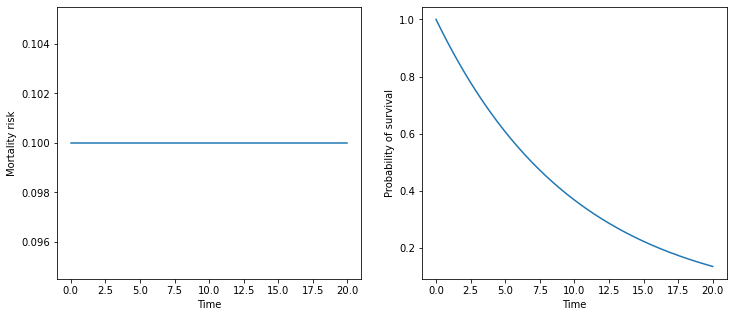

In [3]:
t = np.linspace(0, 20, 200)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

m0 = 0.1

ax[0].plot(t, np.ones(len(t)) * m0)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Mortality risk')

ax[1].plot(t, np.exp(-m0*t))
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Probability of survival');

The corresponding survival curve resembles a radioactive decay or so called *"law of rare events"* where events independently occur with a rate $m_0$. Intuitively, we can treat this survival curve describing survivability of an extremely fragile organism, which dies from a single failure - technically speaking, such organism is unaging. Then, $m_0$ actually describes average number of failures per unit of time and, correspondingly, $1/m_0$ - is a **mean survival time**.

```{dropdown} Exercise
:class: dropdown
Prove that $1/m_0$ - is a mean survival time using a definition of expectation.
```

### Weibull risk model

### Gompertz risk model

### Other cases

* Log-Norm: $log(T) \sim \mathcal{N}$ - if 
* Raeley: $m_0 + m_1(t)$
* Decreasing: after surgery

# Comparison of survival curves

In [4]:
from lifelines.datasets import load_waltons

In [5]:
load_waltons()

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137
...,...,...,...
158,60.0,1,control
159,60.0,1,control
160,60.0,1,control
161,60.0,1,control


# Cox proportional hazard model

In [6]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

NameError: name 'cycler' is not defined

## Learn more

* [Russian video lecture](https://www.youtube.com/watch?v=rLNzoYmnkgQ&ab_channel=ComputerScienceCenter).
* [Gompertz model colab notebook by Alexander Fedintsev](https://colab.research.google.com/drive/1Po-OMzIJ_4hVVj5O7btc8OmjJlu0N3cQ?usp=sharing#scrollTo=-_cpx007cIMn)
* [Python library for hazard modeling](https://lifelines.readthedocs.io/en/latest/index.html)

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)